# Introduction

NOT YET UPDATED

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


agent.py:91: RuntimeWarning: invalid value encountered in less
  action = np.random.choice(self.actions, p=probs)


(episode, score) = (50, 10.0)
(episode, score) = (100, 11.0)
(episode, score) = (150, 10.0)
(episode, score) = (200, 9.0)
(episode, score) = (250, 10.0)
(episode, score) = (300, 10.0)
(episode, score) = (350, 9.0)
(episode, score) = (400, 10.0)
(episode, score) = (450, 10.0)
(episode, score) = (500, 10.0)
(episode, score) = (550, 10.0)
(episode, score) = (600, 10.0)
(episode, score) = (650, 10.0)
(episode, score) = (700, 10.0)
(episode, score) = (750, 9.0)
(episode, score) = (800, 9.0)
(episode, score) = (850, 10.0)
(episode, score) = (900, 8.0)
(episode, score) = (950, 9.0)
(episode, score) = (1000, 10.0)
(episode, score) = (1050, 9.0)
(episode, score) = (1100, 9.0)
(episode, score) = (1150, 9.0)
(episode, score) = (1200, 9.0)
(episode, score) = (1250, 10.0)
(episode, score) = (1300, 9.0)
(episode, score) = (1350, 11.0)
(episode, score) = (1400, 9.0)
(episode, score) = (1450, 10.0)
(episode, score) = (1500, 10.0)
(episode, score) = (1550, 10.0)
(episode, score) = (1600, 10.0)
(episode

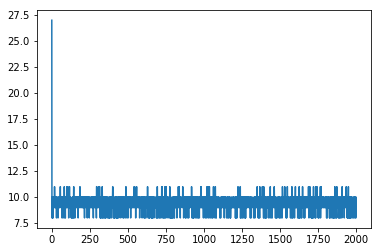

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gym
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
import keras.optimizers 
from keras import backend as K
from agent import Agent
%matplotlib inline


#Env
env = gym.make('CartPole-v0')
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n

#Agent
input_dim, output_dim = num_states, num_actions
lr, gamma, tau, clipnorm, verbose = 10**(-1), 0.99, 0.01, True, False
agent = Agent(input_dim, output_dim, lr, gamma, tau, clipnorm, verbose)

#Train
EPISODES = 2000
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    done = False
    while not done:
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        agent.remember(state[0], action, reward, next_state[0], done)
        state = next_state
    agent.learn()
    scores.append(reward_sum)
    if e % 50 == 0:
        print '(episode, score) = ' + str((e,reward_sum))
plt.plot(scores)

So pretty unstable. But this is just vanilla policy gradient stuff.

### Roughwork

In [16]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam 
from keras.optimizers import RMSprop
from keras import backend as K
from keras.utils import to_categorical

S,A,R,S1,D = agent.get_batch()

pi = agent.actor.model.predict(S)
A1 = np.argmax(pi,axis=1)
A1 = np.array([to_categorical(i,output_dim) for i in A1])

#Find yi
yi = R + (1-D)*agent.gamma*agent.actor.target_model.predict([S1,A1]).flatten()

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 2 arrays: [array([[[ 0.02873186,  0.38604681, -0.089445  , -0.68272521]],

       [[-0.00917305,  0.18519287, -0.02926053, -0.26134317]],

       [[ 0.02493467,  0.18985947, -0.08213871, -0.36531474]],

       ...